<img
     src="tp2.JPG"/>






<b>C'est quoi l'Interpolation Numerique?</b>


En analyse numérique, l'interpolation est<b> une opération mathématique</b> permettant de remplacer une courbe ou une fonction par une autre courbe (ou fonction) plus simple, mais qui coïncide avec la première en un nombre fini de points (ou de valeurs) donnés au départ.







<b> Exemple</b>


<img
     src="tp2.1.png"/>

<b>Estimation de l’erreur </b>

Si on approche une fonction f(x) par un polynôme d’interpolation, on fera évidemment
des erreurs : 

<img
     src="tp2.2.JPG"/>
     
On aimerait être capable d’estimer ces erreurs afin de mesurer la “qualité” de l’approximation polynomiale  :  
f(x)=P(x)+erreur

<img
     src="tp2.3.JPG"/>

# Formule de Lagrange:



$L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)(x_0-x_{n-1})}$                         $$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$
$L_{k}(x)=\displaystyle\frac{(x-x_1)(x-x_2)\ldots(x-x_{k-1})(x-x_{k+1})\ldots(x_0-x_{n})}{(x_k-x_0)(x_k-x_1)\ldots(x_k-x_{k-1})(x_k-x_{k+1})\ldots(x_k-x_{n})}$ pour $k\in \{1,\ldots,n\}$

# Formule de Newton:

l’alternative de Newton (ou méthode des différences divisées). Cette méthode ne diffère de l’interpolation lagrangienne que par la façon dont le polynôme est calculé, le polynôme d’interpolation qui en résulte est le même. Pour cette raison, on parle aussi plutôt de la forme de Newton du polynôme de Lagrange. Le polynôme d’interpolation de Newton associé à la fonction f aux noeuds x0, x1, · · · , xN s’écrit comme suit :





<img
     src="tp2.4.JPG"/>

<b>Exercice 1:</b>

In [2]:
import matplotlib . pyplot as plt
import numpy as np
import math



In [3]:
from numpy import prod
def  PR(x,y,c): 
    
   
    
    s=[]
    n=len(x) 
    for j in range (n):
        L = [c-xx for xx in x]
        
        for k in range(n):
            if (k == j):
                L[k]= 1
            else:
                L[k] = L[k]/(x[j] - x[k])
        s.append(y[j] * prod(L))
    return sum(s)

In [4]:
x=[1, 2, 3, 4]
y=[-1, 0, 2, 1]
for i in x:
    print(PR(x,y,i))

-1.0
0.0
2.0
1.0


<b>La fonction "PR" nous donne  le polynôme d'interpolation de Lagrange pour les deux vecteur x et y.</b>

In [5]:
x=[1,2,3,4]
y=[-1,0,2,1]


In [6]:
def pr(x,y,c):
    S = [] 
    n = len(x)
    for c in x:
            for j in range(n):
                L =[c-xx for xx in x]
                for k in range(n):
                    if (k == j):                
                        L[k] = 1
                    else:
                        L[k] = L[k]/(x[j] - x[k])   
                S.append(y[j]*prod(L))

            return L[3]

In [7]:
for i in x:
    print(pr(x,y,i))

1
1
1
1



3) le graph du polynôme de Lagrange de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$

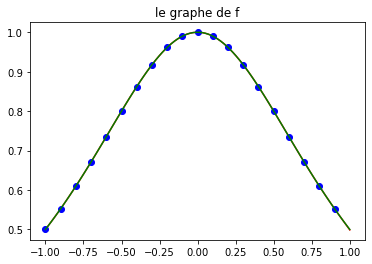

In [28]:
x=np.arange(-1,1,0.1)
pts=[]
f= lambda x:1/(1+x**2)
y=f(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pts.append(PR(x,y,t[i]))
plt.plot(t,pts,"r",x,y,"bo",t,f(t),"g")
plt.title("le graphe de f")
plt.show()    

4) On considère la fonction $F$ suivante :$$
F(h) = \pi -\cos \left(\frac{h}{2}\right) + h \sqrt{1-\left(\frac{h}{2}\right)^2}, \qquad
h\in [0,2],
$$et les points d'interpolation $x_i = ih$, $0\leq i\leq n$, avec $ n=20$ et $h=0.1$.

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux points $x_0,\,\ldots,\,x_n$

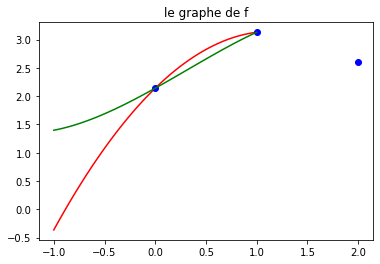

In [10]:
 
x=np.arange(0,3)
pts=[]
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2 = np.vectorize(f)
y=f2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pts.append(PR(x,y,t[i]))
plt.plot(t,pts,"r",x,y,"bo",t,f2(t),"g")
plt.title("le graphe de f")
plt.show()    

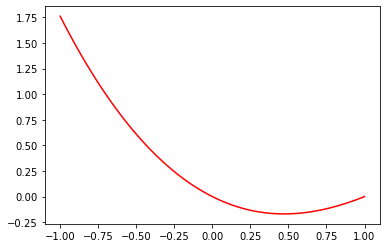

In [11]:
x=np.arange(0,3)
pts=[]
f= lambda x:math.pi-math.cos(x/2)+x*math.sqrt(1-(x/2)**2)
f2 = np.vectorize(f)
y=f2(x)
t=np.linspace(-1,1,100)
for i in range(len(t)):
    pts.append(PR(x,y,t[i]))
plt.plot(t,f2(t)-pts,'r') 
plt.show()

<b>Exercice 2 ( Phenomène de Runge ):</b>


1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$, en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

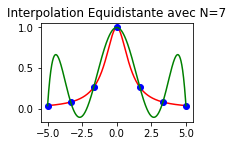

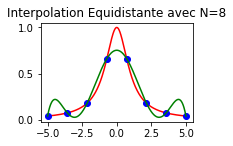

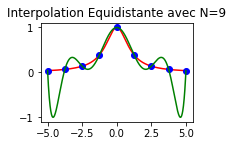

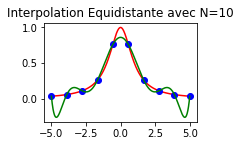

In [12]:
N=7
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=7")
plt.show()
####################################################
N=8
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,2)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=8")
plt.show()
####################################################
N=9
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,3)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=9")
plt.show()
####################################################
N=10
X=np.linspace(-5,5,N)
f=lambda x: 1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1)
t=np.linspace(-5,5,1000)
plt.subplot(2,2,4)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Equidistante avec N=10")
plt.show()


<b>Donc,le polynôme d'interpolation de Lagrange de la fonction  𝑓 ne convergent pas correctement aux voisinages de  −1  et  1 , pour  𝑁=7,8,9,10...</b>

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :$$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev est meilleure qu'une interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [13]:
def tcheb(a,b,n):
    V=[]
    for k in range (n):
        V.append((a+b)/2+(a-b)/2*math.cos((k-1)/(n-1)*math.pi))
    return V   

In [14]:
tcheb(-5,5,11)

[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


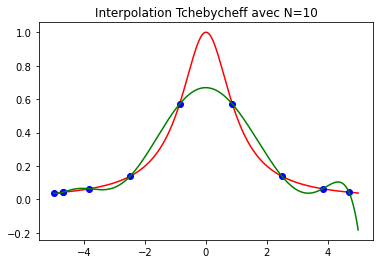

In [16]:
N=10
Y=[]
X=tcheb(-5,5,N)
f=lambda x: 1/(1+x**2)
for i in X:
    Y.append(f(i))
p=np.polyfit(X,Y,N-1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=10")
plt.show()







C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


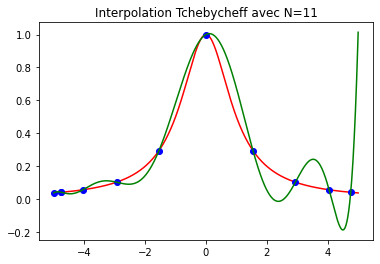

In [18]:

N=11
Y=[]
X=tcheb(-5,5,N)
f=lambda x: 1/(1+x**2)
for i in X:
    Y.append(f(i))
p=np.polyfit(X,Y,N-1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=11")
plt.show()




C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


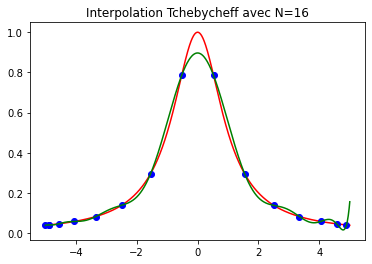

In [19]:

N=16
Y=[]
X=tcheb(-5,5,N)
f=lambda x: 1/(1+x**2)
for i in X:
    Y.append(f(i))
p=np.polyfit(X,Y,N-1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=16")
plt.show()




C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


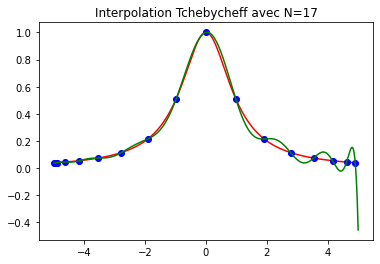

In [20]:

N=17
Y=[]
X=tcheb(-5,5,N)
f=lambda x: 1/(1+x**2)
for i in X:
    Y.append(f(i))
p=np.polyfit(X,Y,N-1)
plt.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
plt.title("Interpolation Tchebycheff avec N=17")
plt.show()




<b>d'après les 4 figures on remarque que l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev est meilleure qu'une interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).</b>

<b>Exercice 3:</b>



On considère les deux programme MATLAB suivant :

function f=intN(x,f)% RECURSIVE


m=length(x);


for k=2:m;


    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
    
    
end





function p=intNval(x,c,t)


m=length(x);


p=c(m)*ones(size(t));



for k=m-1:-1:1;



    p=p.*(t-x(k))+c(k);
    
    
    
end

In [21]:
def intN(x,y):
    m=len(x)
    f=np.zeros(m)
    for k in range(1,m):
        f[k:m+1]=np.array(np.array(y[k:m+1])-np.array(y[k-1:m-1]))/np.array(np.array(x[k:m+1])-np.array(x[0:m-k]))
    return f

In [22]:
x=[-1,0,2,5]
y=[6,1,3,66]
intN(x,y)

array([ 0.        , -5.        ,  0.66666667, 10.5       ])

In [23]:
def intNval(x,y,t):
    m=len(x)
    p=y[m-1]*np.ones(len(t))
    for k in range(m-2,-1,-1):
        p=p*np.array((np.array(t)-x[k]))+y[k]
    return p

In [24]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
intNval(x,y,t)

array([   7., -118.,   27.,  838.])

<b>2/ le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.</b>

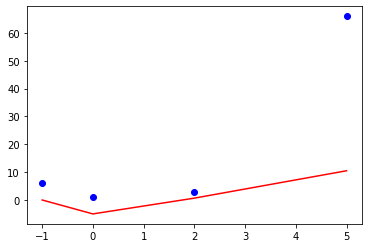

In [25]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)
plt.plot(x,f,'r',x,y,'ob')
plt.show()

<b>3/ $P(1)$ en utilisant le polynôme trouvé en 1)</b>

In [26]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[0]

7.0

<b> $P(2)$ en utilisant le polynôme trouvé en 1)</b>

In [27]:
x=[-1,0,2,5]
y=[6,1,3,66]
t=[0,1,2,3]
p=intNval(x,y,t)
p[1]

-118.0